# Section 1


# What Is A Signal


<img src="sine_wave_sampled.gif?2" width="75%">

In [16]:
import numpy 
from numpy import pi
from scipy import signal, stats, io

from ipywidgets import *

import time
from datetime import datetime



import matplotlib.pyplot as plt

#%matplotlib inline
%matplotlib notebook

In [18]:
print(datetime.now())

2021-09-14 17:35:06.803933


## What Is A Signal


  + Something that carries or conveys information

  + What does that even mean?

  + That is about anything?

  + This is so general it maybe useless, maybe

#### Examples of Signals

#### Sound
    + Acoustic waves
    + Humans hear between 20Hz to 20 KHz
    
  
  <img src="Theme_Classic.png" width="65%" />
  
 https://www.audacityteam.org/

### Sea Levels



<img src="NASA-Satellite-sea-level-rise-observations.jpg" width="40%" />

+ https://climate.nasa.gov/vital-signs/sea-level/

+ https://en.wikipedia.org/wiki/Sea_level_rise


### Stock Prices
 [Game Stop 1 year](https://www.google.com/finance/quote/GME:NYSE?sa=X&sqi=2&ved=2ahUKEwiOzfqbxP_yAhWfQ_EDHVQZDgQQ3ecFegQILhAS&window=1Y)
     
<img src="GameStopStock.png?1" width="55%">

#### Sun Spots

<img src="Sunspots_1302_Sep_2011_by_NASA.jpg" width="85%" >

https://en.wikipedia.org/wiki/Sunspot


#### Sun Spots over time
   
<img src="Sunspot_Numbers.png" width="100%" >

#### Gravity Waves
  + Surface waves
  + Sea waves
  + Eeathquakes
  

https://en.wikipedia.org/wiki/Wake

<img src="duck_wake.jpg" width="100%">

#### Gravitational Waves

+ Find Black Holes combining
+ 1 Billion dollar detector

<img src="1280px-LIGO_Hanford_aerial_05.jpg" width="50%" >

[http://svs.gsfc.nasa.gov/](http://svs.gsfc.nasa.gov//vis/a010000/a010500/a010543/WhtDwrfCollid_ProRes_720x486_59.94fps.webmhd.webm)



+ 2017 Nobel prize



<img src="ns_gw_art.jpg" width="75%">

https://www.ligo.caltech.edu/page/what-are-gw

https://en.wikipedia.org/wiki/Gravitational-wave_observatory


#### Electrical
  + Probably what everyone things of
  + It's all electrical signals at some point
  + Voltage or current changing in
    + Time
    + Node
    + position

<img src="Scope.jpeg" width="100%">

##### Light
  + Cameras
  + Light level



  + Radio Waves
    + 

##### Radar
  + Detecting aircraft, ships, ...
  + Automotive distance sensing
  + Imaging Astreroids
    + Beyond the ability of optical telescopes
    + Each image ~2Km square
    + ~20X Earth-Moon distance



https://www.jpl.nasa.gov/news/nine-radar-images-of-asteroid-2007-pa8

<img src="astro_sar_img.jpg" width="100%">

#### Examples of Signals

  + Sound
  + Sea Level
  + Stock Prices
  + Sun Spots
  + Gravity Waves
  + Electrical 
  + Electromagnetic waves
    + Light
    + Radio Waves
    + Communications
    + Radar
    +
    

##  Basic RF problems

#### Communication
  + Getting data between places

#### Radar
  + Using radio waves to sense something

#### Passive Inference
  + Using Emotions that already exist what can I figure out

## Continuous vs Discrete Signals


  + Analog to Digital Conversion
  + Digital to Analog Conversion
  + Delta Symbol
  + Nyquest Sampling





<img src="sine_wave_sampled.gif" width="100%">

### Continuous

  + 
  + 

### Discrete

  + 
  + 

### Sampling

  + Analog to Digital Conversion

### Time Series
  + Sampled at a regular times
  + Identical Sampling

### Nyquist

  + Sampling two times faster than the bandwidth of the signal

<IPython.core.display.Javascript object>


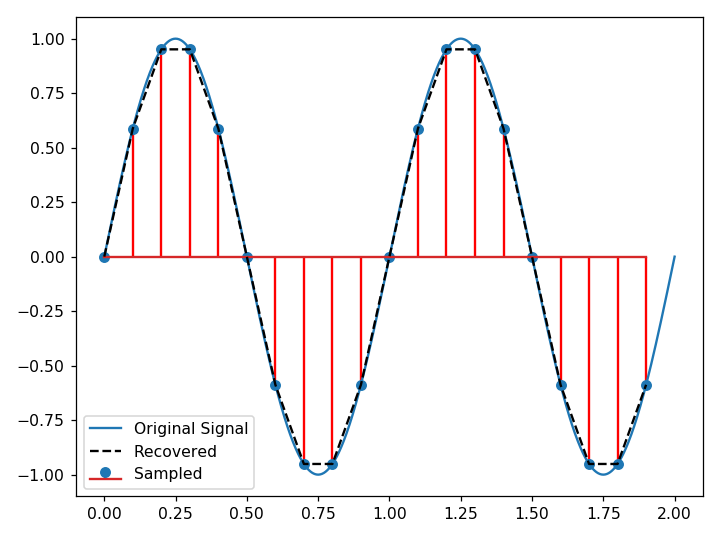

interactive(children=(FloatSlider(value=10.0, description='sample_rate', max=25.0, min=1.0), FloatSlider(value…

In [56]:
t, sample_rate, frequency, phase = numpy.linspace(0, 2, 1001), 10, 1, 0
signal = lambda t, f=1., phi=0: numpy.sin(2*pi*t*f+phi)

fig, ax = plt.subplots()

@interact(sample_rate=(1,25, 0.1), frequency=(-9,10, 0.1), phase=(-6, 6, 0.1))
def sampled_sinwave(sample_rate=sample_rate, frequency=frequency, phase=0.):
    ax.cla()
    t_samples = numpy.arange(min(t), max(t), 1./sample_rate)
    x, x_sampled = signal(t, frequency, phase), signal(t_samples, frequency, phase)
    ax.plot(t, x, label='Original Signal')
    ax.stem(t_samples, x_sampled, linefmt='r', label='Sampled', use_line_collection=True)
    ax.plot(t_samples, x_sampled, '--k', label='Recovered')
    ax.legend(loc='lower left')
    fig.canvas.draw_idle()
    fig.tight_layout()



## What Signals We Are Considering


##  Kinds of basic RF problems

#### Communication
  + Getting data between places

#### Radar
  + Using radio waves to sense something

#### Passive Inference
  + Using Emotions that already exist what can I figure out

## Time Series
  + Sampled at a regular  
  + 

#### Radio Signals
  + Can we capture it we a Software Defined Radio (SDR)

### Single Channel
  + 1 dimension to each sample

### Narrowband
  + Bandwidth of the signal is smaller than it's center frequency
  

## Properties of Operations on Signals (Systems)
  + Linearity
  + Time Inverance 
  + Bounded Input Bounded Output
  + Dirivatives and Differences
  + Integrates and Sumations 
  + Useful Non-linear Functions
    + ABS
    + Squared
    + Distance
    + Log and Decibels

### Linearity

  + Additivity
$$ f(a+b) = f(a) + f(b) $$



  + Homogeneity 
$$ f(\alpha \: x) = \alpha \: f(x) $$



  + Approximately linear
  
    + Useful approximation
    
    + For b << a $f(a+b)$ can be treated as linear
    
    $$ f(a+b) \approx f(a) + f(b) \quad for \:\: b << a $$

#### Linear ?
Is the function linear, non-linear, Approximately linear?
  
  1.  
  
  $$ f(x) = 3 \cdot x $$

  2. 
  
  $$ f(x) = 0 \cdot x $$

  3. 
  
  $$ f(x) = 2 \cdot x+1 $$

  4. 
  
  $$ f(x) = x^{2} $$

### Time Inverance

  + Function or System not dependent on what time it is
  
  $$ y(t) = f(x, t) = f(x, t+a) \quad for \: any \: a $$

#### Time Inverent ?

  1. 
  
  $$ f(x) = 10 \cdot x $$

  2. 
  $$ f(x) = x^{2} + 2x + 1 $$

 3. 
    $$ f(x) = t \cdot x $$

  4. 
  $$ f(x) = x * \delta(t-1) $$
  
    + What is that symbol "$*$" ? 
    + What about that other symbol "$\delta$"?

###  Bounded Input Bounded Output

  + For any input of limited energy the output energy is limited
  
$$ \int_{- \infty}^{\infty} | \: f(x) \:  | \: dt \: < \: \infty  \quad  for \: \int_{- \infty}^{\infty} | \: x \:  | \: dt < \infty$$

#### BIBO System?

1. 
$$ f(x) = 5 \cdot x + 2 $$

  2. 
  $$ f(x) = x^2 $$

  3. 
  $$ f(x) =  \cfrac{1}{x} $$

  4. 
  $$ f(x) = \int_{-\infty}^{t} x^{2}(\tau) \: d \tau $$

### Dirivatives and Differences

#### Dirivative
The rate of chage with respect to another variable.

# Insert Dirivative Graphic

## Random Varaibles
  + Basics of Probablilty
    + Total Probablilty
    + Probability Density Function
    + Cumulative Distribution Function
  + Continuous Vs. Discrete
  + Common Distributions
      + Uniform
      + Exponential
      + Gaussian
      + Chi Squared


  + Conditional Probability 
  + Mean, Variance, and higher Moments
  + Correlation
  + Independent and identically Distributed Random Variables
  + Operations on random variables
  + Central Limit Theorem

### Basics Probability

  
  <img src="probability.png?1" width="75%" >

#### Total Probability
    + Sum of all included outcomes is 1
    
 
 <img src="probability_total.png?1" width="75%" >

#### Probability of 1?
Given a random number generator what are the odd's it will return 1?

<img src="probability_point.png?1" width="75%" >



#### Probability less than 0

<img src="probability_regoin.png?1" width="75%">

### Probability Density Function

  <img src="probability.png?1" width="75%" >

### Cumulative Density Function

<img src="probability_pdf_cdf.png?1" width="65%">

### Continuous 
+ Likelihood function
  + Non-negative
  + Can be greater than 1
  + Probability density Function (PDF)

<img src="probability.png?2" width="90%" >

### Discrete

+ Likelihood function
  + Non-negative
  + 0 or +infinity 
  + Probability Mass Function (PMF)
  
  
<img src="probability_mass_function.png?1" width="90%">

#### Common Distributions
  + Uniform 
    + Eazist to work with
  + Exponential
    + Eazy to work with
  + Gaussian
    + The most common
  + Chi Squared
    + Most common squared
    

<img src="common_distributions.png?0" width="100%">

#### Uniform
$$ P(x) =\Big \{ \begin{matrix} \:1 \: :\quad 0\leq x \leq 1 \\0 : \quad otherwise \end{matrix}$$

sdf





#### Exponetial

### 

    
## Basic Linear Algebra
    + Vector Operations
      + Addition
      + Scaler Multiplication
      + Vector Span
    + Vector Products
      + Elementwise Product
      + Outter Product
      + Inner Product
    

+ Cauchy–Schwarz inequality
+ Matrix Operations
+ Matched Filter
+ Convolution
+ Correlation of random vectors
+ Rotation Matrices

## What is a Vector


$$  \vec{V} \quad = \quad [\:v_1, \:v_2, \: _\cdots, \: v_n ] $$

+ List of numbers with associated operations
  + Direction and magnitude
+ Often thought of as spacial
  + Does not have to be ...
+ Associated Operations
  + More than \( Add, Subtract, Multiply, Divide \)






<img src="vector.png?3" width="75%">

### Vector Addition

$$ \vec{U} = \vec{V} + \vec{W} $$

$$ \begin{matrix}
\; \quad \vec{V} \quad = \quad [\:v_1, \:v_2, \: _\cdots, \: v_n ] \\
+ \quad \vec{W} \quad = \quad [\:w_1, \:w_2, \: _\cdots, \: w_n ] \\ \hline
\quad \vec{U} \quad = \quad [\:u_1, \:u_2, \: _\cdots, \: u_n ]
\end{matrix}
$$

$$
u_1=v_1+w_1 \: , \: u_2=v_2+w_2 \: , \: _\cdots \: , \: u_n=v_n+w_n 
$$

+ Dimentions of each vector?



<img src="vector_addition.png?1" width="85%">

<IPython.core.display.Javascript object>


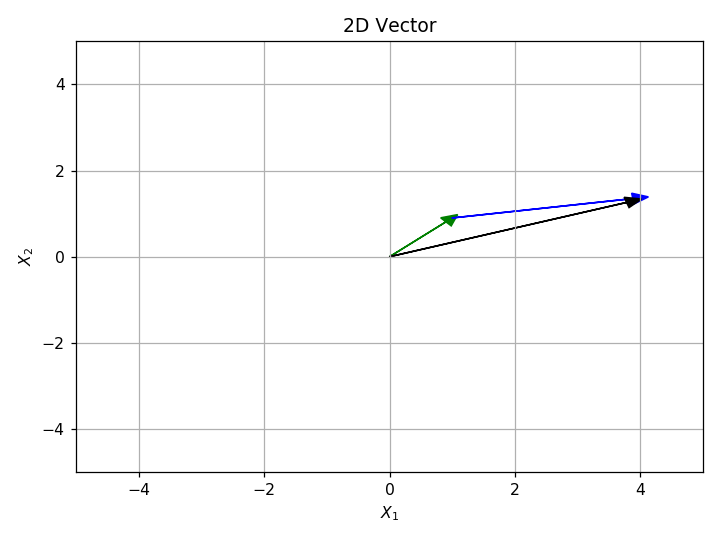

interactive(children=(FloatSlider(value=1.0, description='v1', max=5.0, min=-5.0), FloatSlider(value=2.0, desc…

In [55]:
fig, ax = plt.subplots()


@interact(v1=(-5,5,0.1), v2=(-5,5,0.1), w1=(-5,5,0.1), w2=(-5,5,0.1))
def update(v1=1, v2=2, w1=2, w2=0.5):
    ax.cla()
    u1, u2 = v1+w1, v2+w2
    ax.arrow(0, 0, v1*0.9, v2*0.9, head_width=0.25, head_length=0.25, fc='g', ec='g')
    ax.arrow(v1, v2, w1*0.9, w2*0.9, head_width=0.25, head_length=0.25, fc='b', ec='b')
    ax.arrow(0, 0, u1*0.9, u2*0.9, head_width=0.25, head_length=0.25, fc='k', ec='k')
    fig.canvas.draw_idle()
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.title('2D Vector')
    plt.grid(True)
    fig.tight_layout()

### Dimension and Span

+ How many dimentions does a vector occupy?

+ How much of that space can that vector reach?

<img src="vector_span.png" width="75%">

+ What about 2 vectors?


  + Basic Math Operations
    + Linearity
    + Time Inverance 
    + Bounded Input Bounded Output
    + Dirivatives and Differences
    + Integrates and Sumations 
    + Useful Non-linear Functions
      + ABS
      + Squared
      + Log and Decibels
    
  + Continous Vs. Descrete Signals
    + Analog to Digital Conversion
    + Digital to Analog Conversion
    + Delta Symbol
    + Nyquest Sampling
    
  + Random Varaibles
    + Basics of Probablilty
      + Probability Density Function
      + Total Probablilty
      + Cumulative Distribution Function
    + Continuous Vs. Discrete
    + Common Distributions
      + Uniform
      + Exponential
      + Gaussian
      + Chi Squared
    + Independent and identically Distributed Random Variables
    + Operations on random variables
    + Central Limit Theorem
    + Correlation
    
  + Basic Linear Algebra
    + Vector Operations
      + Addition
      + Scaler Multiplication
      + Vector Span
    + Vector Products
      + Elementwise Product
      + Outter Product
      + Inner Product
    + Matrix Operations
    + Cauchy–Schwarz inequality
    + Matched Filter
    + Convolution
    + Correlation of random vectors
    + Rotation Matrices
    + 
    
  + Frequency / Tone
    + Real valued
    + Matched Filter Real valued
    + Phase
    + Complex Samples
    
  + Complex Number
    + Direct-conversion receiver
    + Negative Frequencies?
    + Relationship between Phase and Delay
    + Complex Random Numbers
  